In [1]:
import numpy as np
import matplotlib.pylab as plt

### 데이터와 행렬

# 데이터의 유형

- scalar
- vector
- matrix
- tensor

#### feature vector

- 예측문제에 입력 데이터로 사용되면 featurevector라고 한다

- numpy vector expression

In [4]:
x1 = np.array([[4.1], [3.1], [2.5]])

In [5]:
x1

array([[4.1],
       [3.1],
       [2.5]])

#### 예측 문제의 입력 데이터는 대부분 벡터로 표시된다.(image to vector)

### image load 

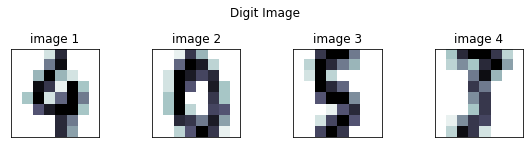

In [44]:
from sklearn.datasets import load_digits
digit = load_digits()
sample = [100, 101, 102, 103]
length = len(sample)

d = []
for i in range(length):
    d.append(digit.images[sample[i]])

plt.figure(figsize=(8,2))
for i in range(length):
    plt.subplot(1,length, i+1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False);plt.xticks([]);plt.yticks([]);
    plt.title("image {}".format(i+1))
    
plt.suptitle("Digit Image")
plt.tight_layout()
plt.show()

### 2-D image --> 1-D image

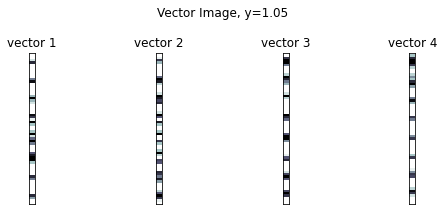

In [66]:
v = []
for i in range(length):
    v.append(d[i].reshape(64,1))
    
plt.figure(figsize=(8,3))
for i in range(length):
    plt.subplot(1,length,i + 1)
    plt.imshow(v[i], aspect=0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False);plt.xticks([]);plt.yticks([]);
    plt.title("vector {}".format(i + 1))
plt.suptitle("Vector Image, y=1.05")
plt.tight_layout(w_pad=4)
plt.show()

In [70]:
from scipy import misc

img_rgb = misc.face()

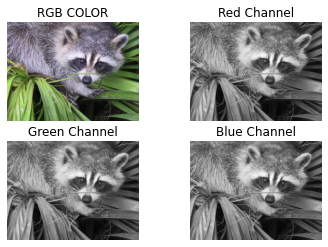

In [79]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)
plt.axis("off")
plt.title("RGB COLOR")

plt.subplot(222)
plt.imshow(img_rgb[:,:,0], cmap=plt.cm.gray)
plt.axis("off")
plt.title("Red Channel")

plt.subplot(223)
plt.imshow(img_rgb[:,:,0], cmap=plt.cm.gray)
plt.axis("off")
plt.title("Green Channel")

plt.subplot(224)
plt.imshow(img_rgb[:,:,0], cmap=plt.cm.gray)
plt.axis("off")
plt.title("Blue Channel")

plt.show()

## Vector and Matrix calc

#### broadcasting
- vector and scalar 계산시에는 관례적으로 1-벡터를 사용하여서 스칼라를 벡터 변환 연산을 허용한다.

$ \begin{bmatrix}
10 \\\\ 
11 \\\\
12
\end{bmatrix}$ 
-10 
= 
$ \begin{bmatrix}
10 \\\\ 
11 \\\\
12
\end{bmatrix}$ 
-
$ \begin{bmatrix}
10 \\\\ 
10 \\\\
10
\end{bmatrix}$ 
=
$ \begin{bmatrix}
0 \\\\ 
-1 \\\\
-2
\end{bmatrix}$ 


### 선형 조합(linear combination)

$c_1x_1 + c_2x_2 + c_3x_3 = x $

### DOT product

In [4]:
import numpy as np

In [9]:
x = np.array([[1],[2],[3]])
y = np.array([[4], [5], [6]])

In [11]:
x.T @ y

array([[32]])

In [13]:
# 주의 일차원 까리는 내적할때 위네는 벡터, 열 벡터라고 가정 한다
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x @ y  # 또는 np.dot(x, y)

32

### 가중합 

In [14]:
# 가중합 복수의 데이터 단숩히 sum 아니라,
# 각자의 수에 가중치 값을 곱하고 결과를 합한것 

### 가중평균

In [16]:
# 가중합의 가중치값을 전체 가중치 값의 합으로 나누면 가중평균 (ex 성적 평균)

### 유사도 

In [17]:
# 벡터의 곱(내적)은 두 벡터간의 유사도 계산하는데 이용
# 유사도(similarity)는 두 벡터가 닮은 정도를 정량적으로 나타낸 값

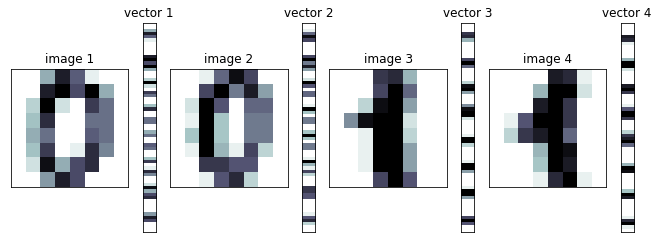

In [28]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)


plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [31]:
print("0과 0의 내적값은" ,(v1.T@v2)[0][0])
print("0과 0의 내적값은" ,(v3.T@v4)[0][0])

0과 0의 내적값은 3064.0
0과 0의 내적값은 3661.0


In [32]:
print("0과 1의 내적값은" ,(v1.T@v3)[0][0])
print("1과 0의 내적값은" ,(v2.T@v4)[0][0])

0과 1의 내적값은 1866.0
1과 0의 내적값은 2479.0


In [33]:
# 같은 이미지 같은 경우 내적값이 크고, 다른 이미지 같은 경우 내적값이 작다 (cos)

## 선형회귀 단점
- 비선형적 현실 세계의 데이터를 잘 예측 못한다 

### 이차형식

- $$w^TX^XXw$$

$$X^TX$$는 정방행렬임으로 정방행렬 A라고 이름 붙이고 
$$w^TAw$$

- Quadratic Form (이차형식)
- 행백터 * 정방행렬 * 열벡터 

### 이차형식을 수식을 풀면 

$$\sum^{N}_{i=1}\sum^{N}_{i=1}a_{i,j}x_ix_j$$
- 총합이 된다

# 행렬의 성질 